In [1]:
import pandas as pd

weather_df = pd.read_csv("3639303.csv")

weather_df['STATION'].unique()

array(['NLE00152502', 'NLE00102445', 'NLE00102462', 'NLE00152480',
       'NLE00152482', 'NLE00152481', 'NLE00152462', 'NLE00152484',
       'NLM00006280', 'NLE00152483', 'NLE00152486', 'NLE00152485',
       'NLE00152488', 'NLM00006260', 'NLE00152468', 'NLM00006380',
       'NLE00152489', 'NLE00152500', 'NLM00006310', 'NLE00152491',
       'NLE00152490', 'NLM00006235', 'NLE00152470', 'NLE00152492',
       'NLE00152473', 'NLE00152495', 'NLE00155389', 'NLE00152494',
       'NLE00152475', 'NLE00152497', 'NLE00152477', 'NLE00152499',
       'NLE00152476', 'NLE00152498', 'NLE00152479', 'NLE00152478'],
      dtype=object)

In [ ]:


# De URL voor GHCN Daily data van 2023
url = "https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/by_year/2023.csv.gz"

# Lees de data direct van de URL
df = pd.read_csv(url, compression='gzip', header=None, low_memory=False)

# Kolommen benoemen volgens GHCN-daily format
df.columns = ['station', 'date', 'element', 'value', 'mflag', 'qflag', 'sflag', 'obstime']

# Je lijst met stations
netherlands_stations = ['NLE00152502', 'NLE00102445', 'NLE00102462', 'NLE00152480',
                        'NLE00152482', 'NLE00152481', 'NLE00152462', 'NLE00152484',
                        'NLM00006280', 'NLE00152483', 'NLE00152486', 'NLE00152485',
                        'NLE00152488', 'NLM00006260', 'NLE00152468', 'NLM00006380',
                        'NLE00152489', 'NLE00152500', 'NLM00006310', 'NLE00152491',
                        'NLE00152490', 'NLM00006235', 'NLE00152470', 'NLE00152492',
                        'NLE00152473', 'NLE00152495', 'NLE00155389', 'NLE00152494',
                        'NLE00152475', 'NLE00152497', 'NLE00152477', 'NLE00152499',
                        'NLE00152476', 'NLE00152498', 'NLE00152479', 'NLE00152478']

# Filter de data voor de Nederlandse stations
df_nl = df[df['station'].isin(netherlands_stations)]

# Filter op temperatuur en neerslag
df_nl_temp_precip = df_nl[df_nl['element'].isin(['TMAX', 'TMIN', 'PRCP'])]

# Omzetten van 'value' naar een meer leesbare format (bijv. Celsius voor temperatuur, mm voor neerslag)
# Let op: GHCN data voor temperatuur is in tienden van graden Celsius; neerslag is in tienden van mm
df_nl_temp_precip.loc[df_nl_temp_precip['element'].isin(['TMAX', 'TMIN']), 'value'] /= 10
df_nl_temp_precip.loc[df_nl_temp_precip['element'] == 'PRCP', 'value'] /= 10

df_nl_temp_precip.head()






# Uitleg Code Fragment

```python
df_nl_temp_precip.loc[df_nl_temp_precip['element'].isin(['TMAX', 'TMIN']), 'value'] /= 10
```

## Stap 1: Selectiecriteria Definiëren
- `df_nl_temp_precip['element'].isin(['TMAX', 'TMIN'])` creëert een boolean Series die waar is voor elke rij waar de `element` kolom ofwel `TMAX` of `TMIN` bevat. Deze waarden vertegenwoordigen de codes voor dagelijkse maximale temperatuur en dagelijkse minimale temperatuur.

## Stap 2: `.loc` Gebruiken voor Geconditioneerde Selectie en Toewijzing

- `df_nl_temp_precip.loc[...]` selecteert en bewerkt rijen en kolommen gebaseerd op de gegeven criteria. De eerste parameter selecteert de rijen op basis van ons criterium uit stap 1, en de tweede parameter `'value'` specificeert dat we de `value` kolom willen bewerken.

## Stap 3: De Waarde Aanpassen

- `...['value'] /= 10` deelt elke waarde in de geselecteerde `value` kolom door 10. Dit converteert temperatuurwaarden van tienden van graden Celsius naar graden Celsius, wat ze gemakkelijker maakt om te interpreteren.

## Uitkomst

Na uitvoering van deze regel bevat de `value` kolom van `df_nl_temp_precip` de aangepaste temperatuurwaarden in graden Celsius, wat de data gemakkelijker interpreteerbaar maakt voor analyse en visualisatie.

In [3]:
df_nl = df_nl_temp_precip

In [4]:
df_nl = df_nl.reset_index(drop=True)

In [5]:
df_nl.index = df_nl.index +1



In [6]:
df_nl.iloc[list(range(4))+list(range(df_nl.shape[0]-3,df_nl.shape[0]))] # hier wordt plus uitgevoerd op het samenvoegen van de twee lijsten

,station,date,element,value,mflag,qflag,sflag,obstime
1,NLE00102445,20230101,TMAX,12.0,NaN,NaN,E,NaN
2,NLE00102445,20230101,TMIN,7.8,NaN,NaN,E,NaN
3,NLE00102462,20230101,TMAX,15.5,NaN,NaN,E,NaN
4,NLE00102462,20230101,TMIN,10.6,NaN,NaN,E,NaN
35928,NLM00006380,20231231,TMAX,10.7,NaN,NaN,E,NaN
35929,NLM00006380,20231231,TMIN,6.5,NaN,NaN,E,NaN
35930,NLM00006380,20231231,PRCP,0.6,NaN,NaN,E,NaN


In [7]:
df_nl['date'] = pd.to_datetime(df_nl['date'], format='%Y%m%d')


In [8]:
df_nl['date'].iloc[0:4]

1   2023-01-01
2   2023-01-01
3   2023-01-01
4   2023-01-01
Name: date, dtype: datetime64[ns]

In [9]:
df_nl.set_index(keys='date',drop=True,inplace=True)

In [10]:
df_nl.index = pd.to_datetime(df_nl.index)

In [11]:
df_nl.index.dtype

dtype('<M8[ns]')

In [12]:
# hoewel de waarde naar date time zijn gezet, moet de index zelf daar ook op ingesteld worden
df_nl.index = pd.DatetimeIndex(df_nl.index)

In [13]:
df_nl['element'].unique()

array(['TMAX', 'TMIN', 'PRCP'], dtype=object)

In [14]:
import pandas as pd

df_wide = df_nl.pivot_table(index=df_nl.index, columns='element', values='value', aggfunc='first')

df_wide['Temp_Verschil'] = df_wide['TMAX'] - df_wide['TMIN']

df_wide.head()


element,PRCP,TMAX,TMIN,Temp_Verschil
date,,,,
2023-01-01,5.2,12.0,7.8,4.2
2023-01-02,4.1,9.1,6.0,3.1
2023-01-03,0.3,9.3,4.2,5.1
2023-01-04,12.3,11.2,9.0,2.2
2023-01-05,0.3,10.6,9.1,1.5



# Herstructureren van DataFrame met Pandas

Het doel is om een DataFrame, waar elke rij overeenkomt met één waarneming en waarbij waarnemingen van verschillende typen ('TMAX', 'TMIN', 'PRCP') op verschillende rijen staan, te herstructureren zodat elke rij overeenkomt met één dag en kolommen heeft voor elk waarnemingstype.

## Uitgangssituatie

De oorspronkelijke DataFrame (`df_nl`) bevat een DateTimeIndex en de volgende belangrijke kolommen:
- `element`: Het type waarneming ('TMAX', 'TMIN', 'PRCP').
- `value`: De waarde van de waarneming.

## Doel

Het doel is om deze DataFrame te herstructureren zodat er per dag slechts één rij is, met afzonderlijke kolommen voor 'TMAX', 'TMIN', en 'PRCP'.

## Methode: Pivot Table

We gebruiken de `pivot_table` functie van pandas om deze transformatie uit te voeren.

### uitleg pivot
De index parameter geeft aan dat we onze oorspronkelijke index (de datums) willen behouden, columns='element' specificeert dat elke unieke waarde in de 'element' kolom een nieuwe kolom moet worden, values='value' geeft aan welke waarden moeten worden gevuld in de nieuwe kolommen, en aggfunc='first' is een aggregatiefunctie die bepaalt hoe meerdere waarden die in dezelfde groep vallen (in dit geval, per dag en element) moeten worden behandeld. Aangezien je per dag en per element type slechts één waarde verwacht, zou aggfunc='first' voldoende moeten zijn.

In [15]:
nan_check = df_wide.isna().sum()

nan_check

element
PRCP             0
TMAX             0
TMIN             0
Temp_Verschil    0
dtype: int64

In [ ]:

import matplotlib.pyplot as plt

# Veronderstel dat maandelijks_gemiddelde_tmax en maandelijks_gemiddelde_tmin al berekend zijn
maandelijks_gemiddelde_tmax = df_wide['TMAX'].resample('M').mean()
maandelijks_gemiddelde_tmin = df_wide['TMIN'].resample('M').mean()

# Bereken het verschil tussen de gemiddelde maximale en minimale temperatuur
temperatuur_verschil = maandelijks_gemiddelde_tmax - maandelijks_gemiddelde_tmin

# Plot het maandelijks gemiddelde van 'TMAX' en 'TMIN', en het verschil
plt.figure(figsize=(10, 6))
plt.plot(maandelijks_gemiddelde_tmax.index, maandelijks_gemiddelde_tmax, label='Gem. Max Temp', color='red')
plt.plot(maandelijks_gemiddelde_tmin.index, maandelijks_gemiddelde_tmin, label='Gem. Min Temp', color='blue')
plt.plot(temperatuur_verschil.index, temperatuur_verschil, label='Verschil Max-Min Temp', color='green', linestyle='--', linewidth=2)

plt.title('Gemiddelde Maximale en Minimale Temperatuur per Maand en Verschil')
plt.xlabel('Maand')
plt.ylabel('Temperatuur (°C)')
plt.legend()
plt.grid(True)
plt.show()

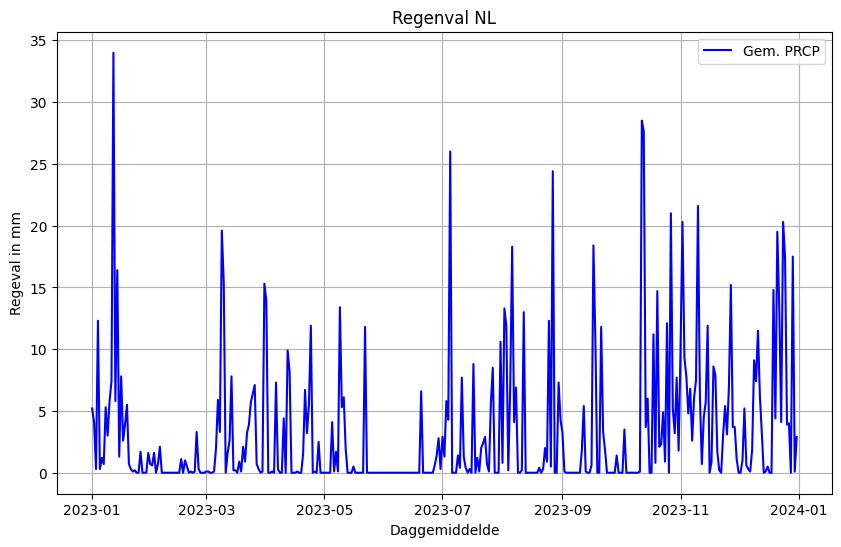

In [17]:
dagelijks_gemiddelde_prcp = df_wide['PRCP'].resample('D').mean()

plt.figure(figsize=(10, 6))
plt.plot(dagelijks_gemiddelde_prcp.index, dagelijks_gemiddelde_prcp, label='Gem. PRCP', color='blue')

plt.title('Regenval NL')
plt.xlabel('Daggemiddelde')
plt.ylabel('Regeval in mm')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import matplotlib.pyplot as plt

maandelijks_gemiddelde_prcp_maand = df_wide['PRCP'].resample('M').mean()

# Plot het dagelijkse en maandelijkse gemiddelde van PRCP
plt.figure(figsize=(10, 6))

# Dagelijks gemiddelde
plt.plot(dagelijks_gemiddelde_prcp.index, dagelijks_gemiddelde_prcp, label='Dagelijks Gem. PRCP', color='blue', alpha=0.5)

# Maandelijkse gemiddelde warmste temp
plt.plot(maandelijks_gemiddelde_prcp_maand.index, maandelijks_gemiddelde_prcp_maand, label='Gem. Max PRCP', color='red')

#legend
plt.title('Regenval NL: Dagelijks en Maandelijks Gemiddelde')
plt.xlabel('Datum')
plt.ylabel('Regenval in mm')
plt.legend()
plt.grid(True)
plt.show()


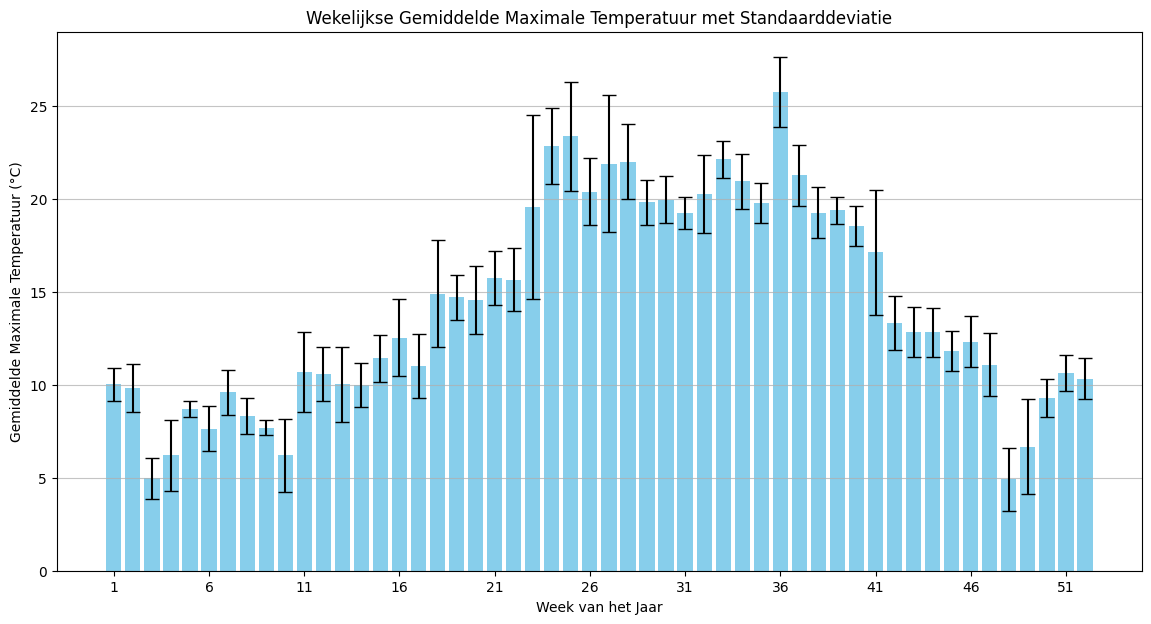

In [20]:
import numpy as np
# Verkrijg weeknummers van het jaar
weken_van_het_jaar = df_wide.index.isocalendar().week

# Bereken het gemiddelde en de standaarddeviatie van TMAX per week van het jaar
week_gemiddelden = df_wide['TMAX'].groupby(weken_van_het_jaar).mean()
week_std_dev = df_wide['TMAX'].groupby(weken_van_het_jaar).std()

# Maak een barplot voor het gemiddelde en gebruik de standaarddeviatie als foutenbalken (error bars)
plt.figure(figsize=(14, 7))
plt.bar(week_gemiddelden.index, week_gemiddelden, color='skyblue', yerr=week_std_dev, capsize=5)

plt.title('Wekelijkse Gemiddelde Maximale Temperatuur met Standaarddeviatie')
plt.xlabel('Week van het Jaar')
plt.ylabel('Gemiddelde Maximale Temperatuur (°C)')
plt.xticks(np.arange(min(weken_van_het_jaar), max(weken_van_het_jaar)+1, 5))  # Pas de x-as aan voor wekelijkse labels
plt.grid(axis='y', alpha=0.75)

plt.show()

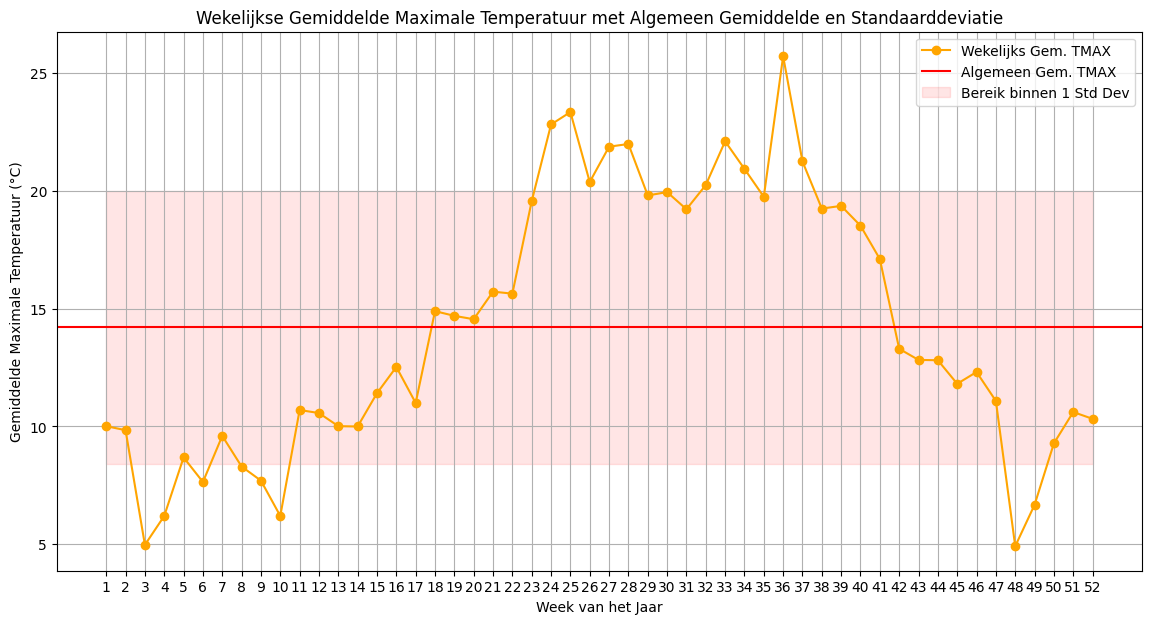

In [21]:

# Bereken algemene statistieken
algemeen_gemiddelde_tmax = df_wide['TMAX'].mean()
algemene_std_dev_tmax = df_wide['TMAX'].std()

# Bereik voor één standaarddeviatie van het gemiddelde
ondergrens = algemeen_gemiddelde_tmax - algemene_std_dev_tmax
bovengrens = algemeen_gemiddelde_tmax + algemene_std_dev_tmax

# Aangenomen dat week_gemiddelden en de algemene statistieken reeds berekend zijn

plt.figure(figsize=(14, 7))
plt.plot(week_gemiddelden.index, week_gemiddelden, label='Wekelijks Gem. TMAX', color='orange', marker='o')

# Horizontale lijn voor het algemene gemiddelde van TMAX
plt.axhline(y=algemeen_gemiddelde_tmax, color='r', linestyle='-', label='Algemeen Gem. TMAX')

# Voeg schaduw toe voor het bereik binnen één standaarddeviatie
plt.fill_between(week_gemiddelden.index, ondergrens, bovengrens, color='red', alpha=0.1, label='Bereik binnen 1 Std Dev')

plt.title('Wekelijkse Gemiddelde Maximale Temperatuur met Algemeen Gemiddelde en Standaarddeviatie')
plt.xlabel('Week van het Jaar')
plt.ylabel('Gemiddelde Maximale Temperatuur (°C)')
plt.xticks(np.arange(1, 53, step=1))
plt.legend()
plt.grid(True)
plt.show()